# Car Insurance Claim Prediction

## Importing required modules

In [103]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

## Getting data

In [104]:
df_train = pd.read_csv("data/proj28/train.csv")
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [105]:
df_train.head().T

,0,1,2,3,4
policy_id,ID00001,ID00002,ID00003,ID00004,ID00005
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403
age_of_car,0.05,0.02,0.02,0.11,0.11
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615
area_cluster,C1,C2,C3,C4,C5
population_density,4990,27003,4076,21622,34738
make,1,1,1,1,2
segment,A,A,A,C1,A
model,M1,M1,M1,M2,M3
fuel_type,CNG,CNG,CNG,Petrol,Petrol


## Data cleaning and preprocessing

In [106]:
df_train.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [108]:
df_train.drop(["policy_id"], axis=1, inplace=True)

In [109]:
for column in df_train.keys():
    if pd.api.types.is_object_dtype(df_train[column]) == True:
        le = LabelEncoder()
        df_train[column] = le.fit_transform(df_train[column])
        print(column)
        print("-"*20)
        print(le.classes_)
        print("-"*20)
    else:
        pass

area_cluster
--------------------
['C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C2'
 'C20' 'C21' 'C22' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']
--------------------
segment
--------------------
['A' 'B1' 'B2' 'C1' 'C2' 'Utility']
--------------------
model
--------------------
['M1' 'M10' 'M11' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9']
--------------------
fuel_type
--------------------
['CNG' 'Diesel' 'Petrol']
--------------------
max_torque
--------------------
['113Nm@4400rpm' '170Nm@4000rpm' '200Nm@1750rpm' '200Nm@3000rpm'
 '250Nm@2750rpm' '60Nm@3500rpm' '82.1Nm@3400rpm' '85Nm@3000rpm'
 '91Nm@4250rpm']
--------------------
max_power
--------------------
['113.45bhp@4000rpm' '118.36bhp@5500rpm' '40.36bhp@6000rpm'
 '55.92bhp@5300rpm' '61.68bhp@6000rpm' '67.06bhp@5500rpm'
 '88.50bhp@6000rpm' '88.77bhp@4000rpm' '97.89bhp@3600rpm']
--------------------
engine_type
--------------------
['1.0 SCe' '1.2 L K Series Engine' '1.2 L K12N Dualjet' '1.5 L U2 CRDi'
 '1.5 Turbochar

In [110]:
df_train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop("is_claim", axis=1), df_train["is_claim"], test_size=0.2)

## Training the Model SKLEARN

In [112]:
rclf = RandomForestClassifier()
rclf.fit(X_train, y_train)
rclf.score(X_test, y_test)

0.9324174417612424

In [113]:
knclf = KNeighborsClassifier()
knclf.fit(X_train, y_train)
knclf.score(X_test, y_test)

0.9338680774810137

In [114]:
svclf = SVC()
svclf.fit(X_train, y_train)
svclf.score(X_test, y_test)

0.93625735984299

In [115]:
xgclf = XGBClassifier()
xgclf.fit(X_train, y_train)
xgclf.score(X_test, y_test)

/media/djoe/HardDisk/LearningStuff/AnaCondaEnvs/deepLearning/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/media/djoe/HardDisk/LearningStuff/AnaCondaEnvs/deepLearning/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:00:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9361720283300623

## Training Artificial Neural Network

In [116]:
import tensorflow as tf

In [117]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=42, activation='relu'))
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,  activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,  activation='sigmoid'))

In [118]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
model_info = ann.fit(X_train.values, y_train.values, batch_size=32, epochs=25, validation_data=[X_test.values, y_test.values])

Epoch 1/25
1465/1465 [==============================] - 3s 2ms/step - loss: 0.7364 - accuracy: 0.9294 - val_loss: 0.3326 - val_accuracy: 0.9363
Epoch 2/25
1465/1465 [==============================] - 3s 2ms/step - loss: 0.2846 - accuracy: 0.9360 - val_loss: 0.2548 - val_accuracy: 0.9363
Epoch 3/25
1465/1465 [==============================] - 3s 2ms/step - loss: 0.2455 - accuracy: 0.9360 - val_loss: 0.2393 - val_accuracy: 0.9363
Epoch 4/25
1465/1465 [==============================] - 3s 2ms/step - loss: 0.2386 - accuracy: 0.9360 - val_loss: 0.2373 - val_accuracy: 0.9363
Epoch 5/25
1465/1465 [==============================] - 2s 2ms/step - loss: 0.2379 - accuracy: 0.9360 - val_loss: 0.2371 - val_accuracy: 0.9363
Epoch 6/25
1465/1465 [==============================] - 3s 2ms/step - loss: 0.2379 - accuracy: 0.9360 - val_loss: 0.2371 - val_accuracy: 0.9363
Epoch 7/25
1465/1465 [==============================] - 2s 2ms/step - loss: 0.2379 - accuracy: 0.9360 - val_loss: 0.2371 - val_accuracy:

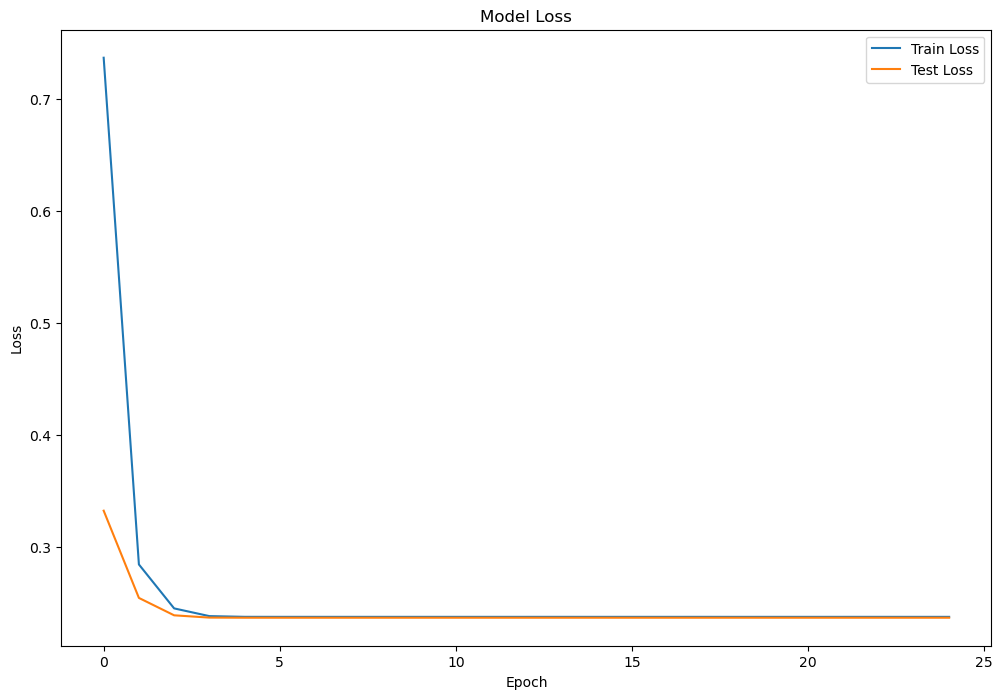

In [120]:
# Checking Overfitting

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(12, 8))

model_train_loss = model_info.history["loss"]
model_train_acc  = model_info.history['accuracy']
model_test_loss  = model_info.history["val_loss"]
model_test_acc  = model_info.history["val_accuracy"]

ax.plot(model_train_loss, label="Train Loss")
ax.plot(model_test_loss, label="Test Loss")
plt.title("Model Loss")         
plt.xlabel("Epoch")
plt.ylabel("Loss")
ax.legend()

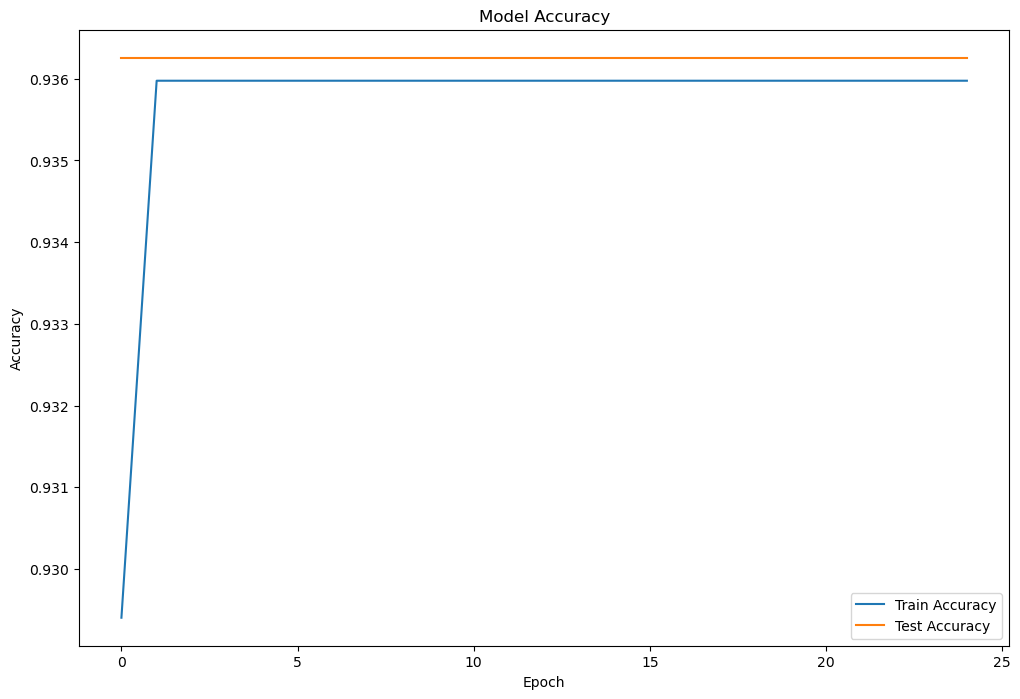

In [121]:
_, ax = plt.subplots(figsize=(12, 8))

ax.plot(model_train_acc, label="Train Accuracy")
ax.plot(model_test_acc, label="Test Accuracy")
plt.title("Model Accuracy")         
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax.legend()
plt.show()

In [122]:
df_test = pd.read_csv("data/proj28/test.csv")
df_test.drop(["policy_id"], axis=1, inplace=True)
for column in df_test.keys():
    if pd.api.types.is_object_dtype(df_test[column]) == True:
        le = LabelEncoder()
        df_test[column] = le.fit_transform(df_test[column])
    else:
        pass
df_test

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,15,4076,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
1,0.307241,0.13,0.442308,20,8794,1,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2
2,0.327924,0.12,0.451923,20,8794,2,0,4,2,8,...,0,0,1,1,1,0,1,1,1,2
3,0.782654,0.01,0.461538,17,34738,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
4,1.233404,0.02,0.634615,17,34738,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,11,27003,1,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2
39059,1.224838,0.05,0.509615,20,8794,3,4,5,1,4,...,1,1,1,1,1,1,0,1,1,3
39060,0.520287,0.12,0.355769,18,13051,1,2,8,2,0,...,1,1,1,1,1,1,1,1,1,0
39061,1.172391,0.08,0.644231,17,34738,1,3,3,2,0,...,1,1,1,1,1,1,1,1,1,2


In [123]:
df_test.values[0]

array([3.41731679e-01, 0.00000000e+00, 5.86538462e-01, 1.50000000e+01,
       4.07600000e+03, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.00000000e+00, 2.00000000e+00, 6.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.96000000e+02,
       3.00000000e+00, 1.00000000e+00, 5.00000000e+00, 2.00000000e+00,
       4.60000000e+00, 3.44500000e+03, 1.51500000e+03, 1.47500000e+03,
       1.18500000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

In [124]:
neural_preds = ann.predict(df_test.values) > 0.5

1221/1221 [==============================] - 1s 1ms/step


In [125]:
skl_preds = rclf.predict(df_test.values)

/media/djoe/HardDisk/LearningStuff/AnaCondaEnvs/deepLearning/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [126]:
np.unique(skl_preds, return_counts=True)

(array([0, 1]), array([38873,   190]))

In [128]:
# Poor Ann for my ML *_*